# Loading the dataset and understanding it

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Loading The DataSet
import pandas as pd
cal_dtype ={"distance": "float32", "consume": "float32", "speed": "int16", 
         "temp_inside": "float32", "temp_outside": "float32", 'specials': 'category', "gas_type": "category",
        "AC": "int16", "rain": "int16", "sun": "int16", 'refill liters': 'float32', 'refill gas': 'category' }
data = pd.read_csv("measurements.csv",decimal=",",dtype = cal_dtype)

data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   distance       388 non-null    float32 
 1   consume        388 non-null    float32 
 2   speed          388 non-null    int16   
 3   temp_inside    376 non-null    float32 
 4   temp_outside   388 non-null    float32 
 5   specials       93 non-null     category
 6   gas_type       388 non-null    category
 7   AC             388 non-null    int16   
 8   rain           388 non-null    int16   
 9   sun            388 non-null    int16   
 10  refill liters  13 non-null     float32 
 11  refill gas     13 non-null     category
dtypes: category(3), float32(5), int16(4)
memory usage: 12.3 KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


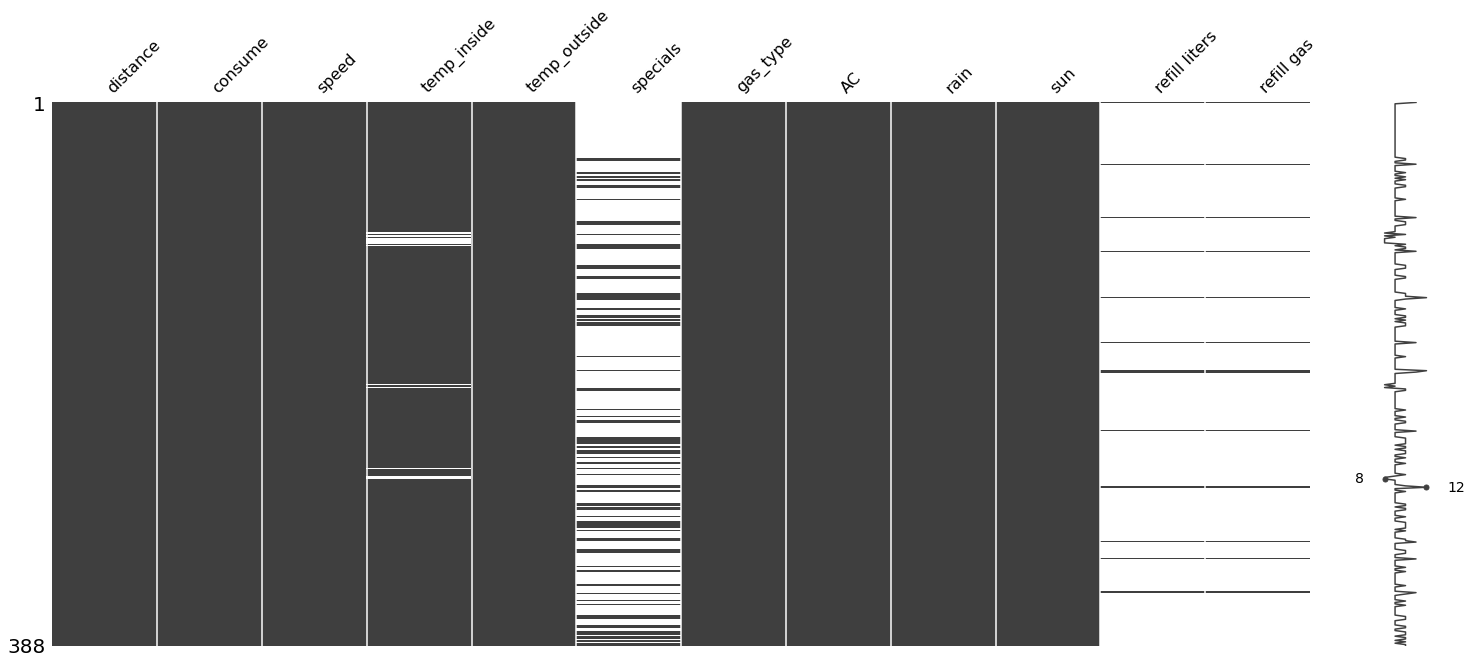

In [0]:
import missingno as msno
msno.matrix(data)

# Data-Preprocessing

In [0]:
# Pre=processing the refill gas column
data['refill liters'] = data['refill liters'].fillna(0)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,0.0,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,0.0,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,0.0,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,0.0,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,0.0,NaN
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,0.0,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,0.0,NaN


In [0]:
for col, col_dtype in cal_dtype.items():
  if col_dtype == "category":
    data[col] = data[col].cat.codes.astype("int16")
    data[col] -= data[col].min()

In [0]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12.0,0,0,0,0,0,45.0,1
1,12.0,4.2,30,21.5,13.0,0,0,0,0,0,0.0,0
2,11.2,5.5,38,21.5,15.0,0,0,0,0,0,0.0,0
3,12.9,3.9,36,21.5,14.0,0,0,0,0,0,0.0,0
4,18.5,4.5,46,21.5,15.0,0,0,0,0,0,0.0,0
5,8.3,6.4,50,21.5,10.0,0,0,0,0,0,0.0,0
6,7.8,4.4,43,21.5,11.0,0,0,0,0,0,0.0,0
7,12.3,5.0,40,21.5,6.0,0,0,0,0,0,0.0,0
8,4.9,6.4,26,21.5,4.0,0,0,0,0,0,0.0,0
9,11.9,5.3,30,21.5,9.0,0,0,0,0,0,0.0,0


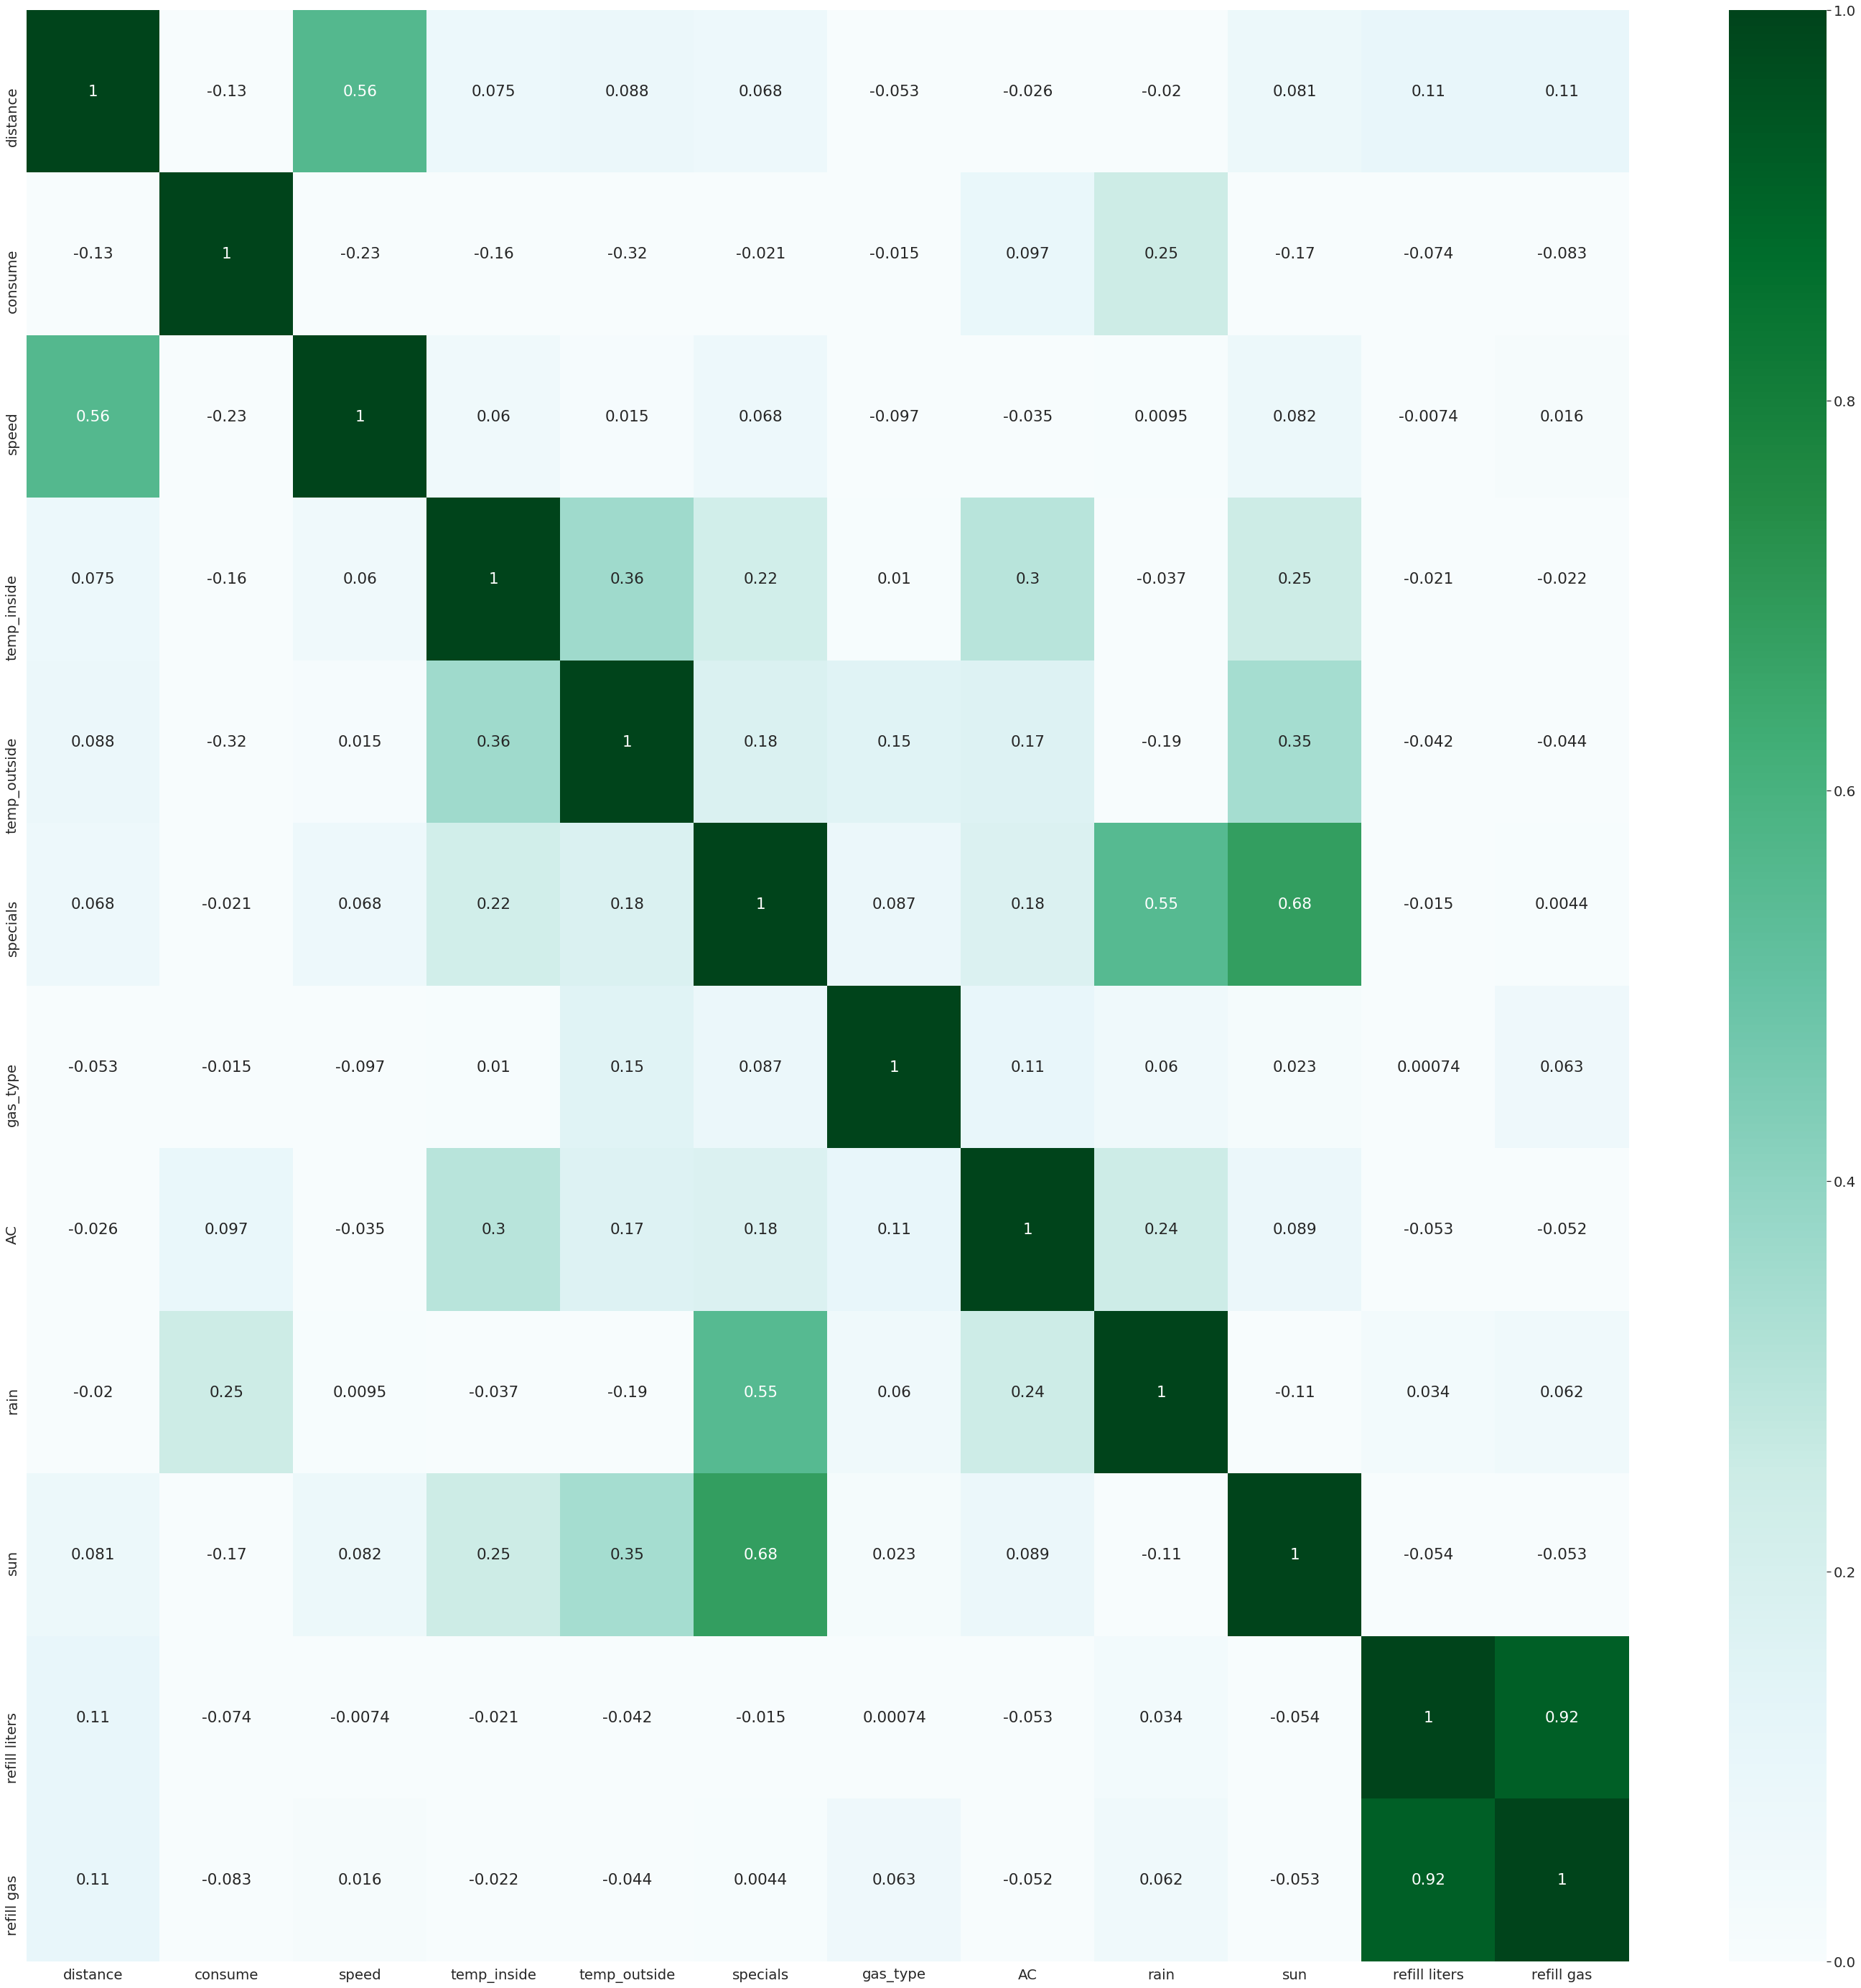

In [0]:
# Correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.8)
plt.figure(figsize = (50,50))
corr = data.corr()
ax = sns.heatmap(corr,
        annot=True,
        vmin=0,
        vmax=1,
        cmap="BuGn")
plt.savefig(fname="Corr1")

In [0]:
data1 = data.drop(columns=['specials','refill liters','refill gas'])

In [0]:
#  Reorder the dataframe
cols = ["distance", "speed", "temp_inside", "temp_outside", "gas_type",
        "AC", "rain", "sun", "consume" ]
data1 = data1[cols]

In [0]:
data1

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume
0,28.0,26,21.5,12.0,0,0,0,0,5.0
1,12.0,30,21.5,13.0,0,0,0,0,4.2
2,11.2,38,21.5,15.0,0,0,0,0,5.5
3,12.9,36,21.5,14.0,0,0,0,0,3.9
4,18.5,46,21.5,15.0,0,0,0,0,4.5
...,...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18.0,1,0,0,0,3.7
384,16.1,38,25.0,31.0,1,1,0,0,4.3
385,16.0,45,25.0,19.0,1,0,0,0,3.8
386,15.4,42,25.0,31.0,1,1,0,0,4.6


In [0]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import json


imputer = KNNImputer(n_neighbors=9)
dataimput = imputer.fit_transform(data1)
data2 = pd.DataFrame(dataimput,columns=cols)


In [0]:
data2

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume
0,28.0,26.0,21.5,12.0,0.0,0.0,0.0,0.0,5.0
1,12.0,30.0,21.5,13.0,0.0,0.0,0.0,0.0,4.2
2,11.2,38.0,21.5,15.0,0.0,0.0,0.0,0.0,5.5
3,12.9,36.0,21.5,14.0,0.0,0.0,0.0,0.0,3.9
4,18.5,46.0,21.5,15.0,0.0,0.0,0.0,0.0,4.5
...,...,...,...,...,...,...,...,...,...
383,16.0,39.0,24.5,18.0,1.0,0.0,0.0,0.0,3.7
384,16.1,38.0,25.0,31.0,1.0,1.0,0.0,0.0,4.3
385,16.0,45.0,25.0,19.0,1.0,0.0,0.0,0.0,3.8
386,15.4,42.0,25.0,31.0,1.0,1.0,0.0,0.0,4.6


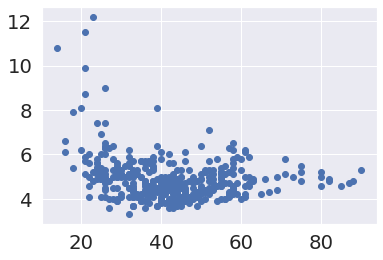

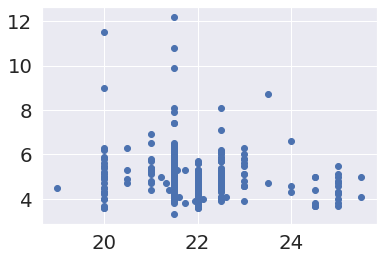

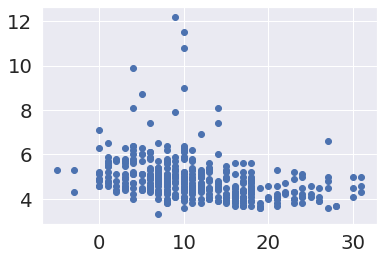

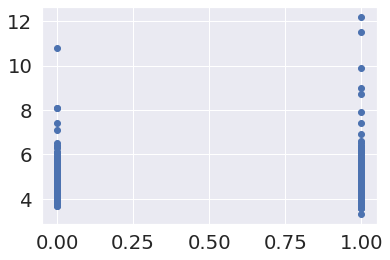

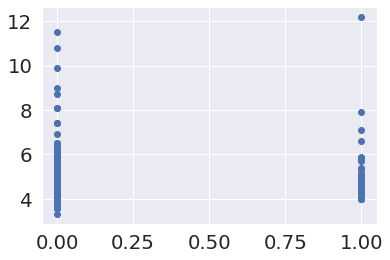

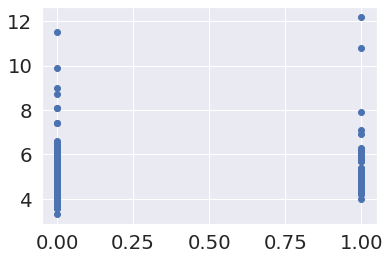

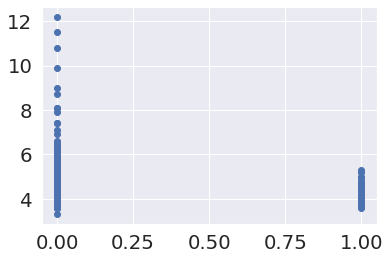

In [0]:
for i in range(1,8):
  plt.scatter(data2.iloc[:,i], data2.iloc[:,-1])
  plt.show()

In [0]:
#Removing outliers
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data2))
threshold = 3
print(np.where(z > 5))
print(np.where(z > 5)[0].shape)

data_wo_out = data2[(z < 6).all(axis=1)]

(array([ 55,  61, 106, 147, 210, 318, 319]), array([0, 8, 0, 8, 8, 0, 0]))
(7,)


In [0]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x_scale = minmax.fit_transform(data_wo_out.iloc[:,:-1])
print(x_scale)
print(x_scale)

[[0.17325427 0.16216215 0.38461542 ... 0.         0.         0.        ]
 [0.06785244 0.2162162  0.38461542 ... 0.         0.         0.        ]
 [0.06258234 0.3243243  0.38461542 ... 0.         0.         0.        ]
 ...
 [0.0942029  0.4189189  0.92307687 ... 0.         0.         0.        ]
 [0.09025033 0.3783784  0.92307687 ... 1.         0.         0.        ]
 [0.085639   0.14864865 0.92307687 ... 1.         0.         0.        ]]
[[0.17325427 0.16216215 0.38461542 ... 0.         0.         0.        ]
 [0.06785244 0.2162162  0.38461542 ... 0.         0.         0.        ]
 [0.06258234 0.3243243  0.38461542 ... 0.         0.         0.        ]
 ...
 [0.0942029  0.4189189  0.92307687 ... 0.         0.         0.        ]
 [0.09025033 0.3783784  0.92307687 ... 1.         0.         0.        ]
 [0.085639   0.14864865 0.92307687 ... 1.         0.         0.        ]]


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_wo_out.iloc[:,:-1],data_wo_out.iloc[:,-1], test_size=0.20, random_state=6)

# Training and testing different algorithms

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics

clf = LinearRegression().fit(X_train, y_train)
ypred = clf.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred.flatten()})
print(df)
lmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print(lmse)

     Actual  Predicted
166     4.8   5.034636
227     5.1   5.390520
235     4.8   5.376911
94      5.9   5.871560
293     4.6   4.676813
..      ...        ...
226     4.6   4.433035
263     5.4   5.139534
223     4.0   4.560372
232     5.0   4.483030
117     6.0   5.520930

[77 rows x 2 columns]
0.6633502


In [0]:
#out of sample score
from sklearn.svm import SVR

clf = SVR(C=1.0, kernel='poly', degree=4, gamma='scale').fit(X_train, y_train)
ypred = clf.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred.flatten()})
print(df)

smse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print(smse)

     Actual  Predicted
166     4.8   4.852546
227     5.1   4.832233
235     4.8   5.024581
94      5.9   5.148667
293     4.6   4.642534
..      ...        ...
226     4.6   4.407716
263     5.4   5.043885
223     4.0   4.434136
232     5.0   4.768906
117     6.0   4.840786

[77 rows x 2 columns]
0.6190729072117888


In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,50),
            'n_estimators': (10, 50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

In [0]:
best_params

{'max_depth': 19, 'n_estimators': 50}

In [0]:
import pickle
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False).fit(X_train, y_train)
pickle.dump(rfr, open("final_model.sav", 'wb'))
X_test.loc[166,'speed'] = 95
ypred = rfr.predict(X_test)



df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred.flatten()})
print(df)

rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print(rmse)

     Actual  Predicted
166     4.8      5.010
227     5.1      4.940
235     4.8      5.160
94      5.9      5.134
293     4.6      4.208
..      ...        ...
226     4.6      4.844
263     5.4      6.040
223     4.0      4.856
232     5.0      4.956
117     6.0      5.032

[77 rows x 2 columns]
0.48595938597996363


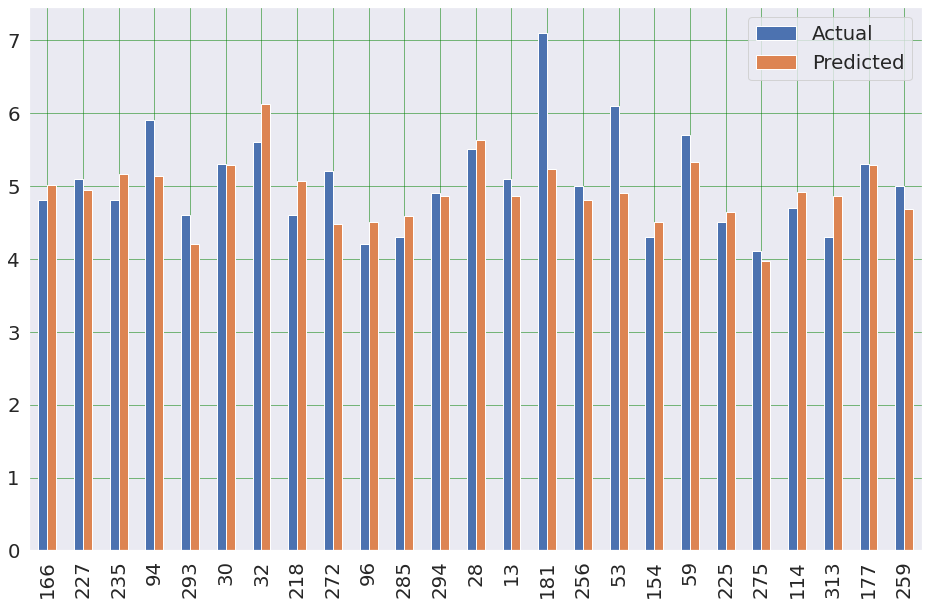

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

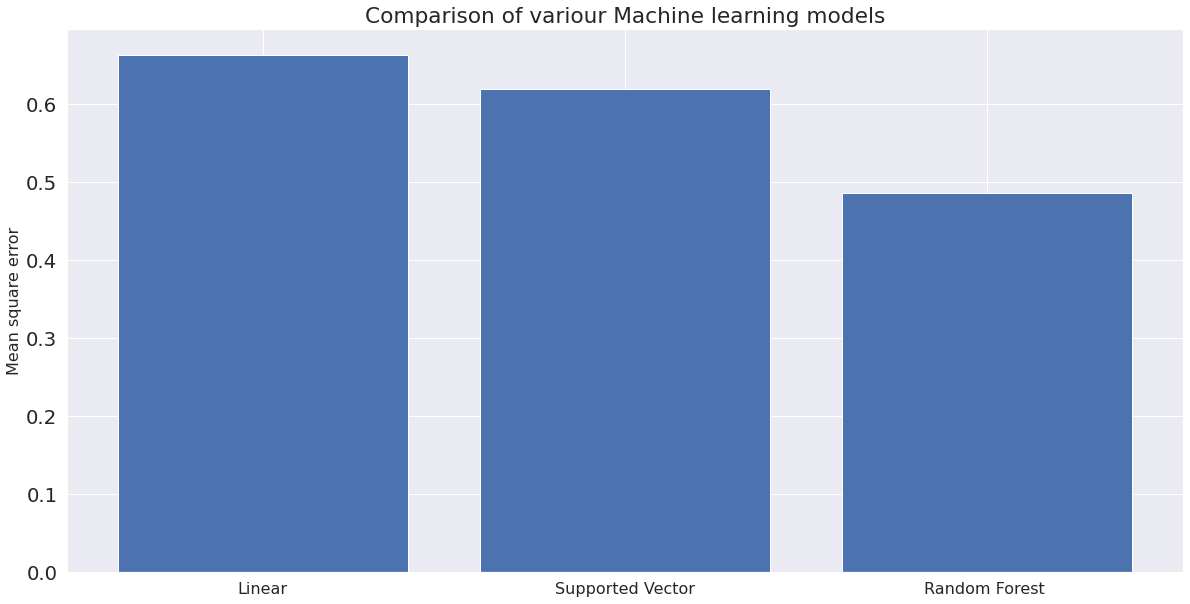

In [0]:
# x axis values 
x = ["Linear","Supported Vector","Random Forest "] 
# corresponding y axis values 
y = [lmse,smse,rmse] 
plt.figure(figsize=(20,10))
# plotting the points  
plt.bar(x, y) 
plt.xticks(rotation=0)
plt.tick_params(axis="x", labelsize=16)


# naming the x axis 
#plt.xlabel("Regression Algorithms",fontsize=13) 
# naming the y axis 
plt.ylabel('Mean square error',fontsize=16) 
  
# giving a title to my graph 
plt.title('Comparison of variour Machine learning models') 
  
# function to show the plot 
plt.show() 

# Selected Model

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,50),
            'n_estimators': (10, 50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(data_wo_out.iloc[:,:-1], data_wo_out.iloc[:,-1])
best_params = grid_result.best_params_

In [0]:
best_params

{'max_depth': 20, 'n_estimators': 50}

In [0]:
import pickle
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False).fit(data_wo_out.iloc[:,:-1], data_wo_out.iloc[:,-1])
pickle.dump(rfr, open("final_model.sav", 'wb'))

In [0]:
new_data = pd.DataFrame(data= data_wo_out,columns = cols) 
new_data

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume
0,28.0,26.0,21.5,12.0,0.0,0.0,0.0,0.0,5.0
1,12.0,30.0,21.5,13.0,0.0,0.0,0.0,0.0,4.2
2,11.2,38.0,21.5,15.0,0.0,0.0,0.0,0.0,5.5
3,12.9,36.0,21.5,14.0,0.0,0.0,0.0,0.0,3.9
4,18.5,46.0,21.5,15.0,0.0,0.0,0.0,0.0,4.5
...,...,...,...,...,...,...,...,...,...
383,16.0,39.0,24.5,18.0,1.0,0.0,0.0,0.0,3.7
384,16.1,38.0,25.0,31.0,1.0,1.0,0.0,0.0,4.3
385,16.0,45.0,25.0,19.0,1.0,0.0,0.0,0.0,3.8
386,15.4,42.0,25.0,31.0,1.0,1.0,0.0,0.0,4.6


In [0]:
new_data.to_csv('processed_data.csv',index=False)

In [0]:
nsaas = pd.DataFrame(data= x_scale,columns = cols[:-1]) 
nsaas

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.173254,0.162162,0.384615,0.472222,0.0,0.0,0.0,0.0
1,0.067852,0.216216,0.384615,0.500000,0.0,0.0,0.0,0.0
2,0.062582,0.324324,0.384615,0.555556,0.0,0.0,0.0,0.0
3,0.073781,0.297297,0.384615,0.527778,0.0,0.0,0.0,0.0
4,0.110672,0.432432,0.384615,0.555556,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
378,0.094203,0.337838,0.846154,0.638889,1.0,0.0,0.0,0.0
379,0.094862,0.324324,0.923077,1.000000,1.0,1.0,0.0,0.0
380,0.094203,0.418919,0.923077,0.666667,1.0,0.0,0.0,0.0
381,0.090250,0.378378,0.923077,1.000000,1.0,1.0,0.0,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler

x_scale = MinMaxScaler().fit_transform(data_wo_out.iloc[:,:-1])

In [0]:
def compute_data(new_data, col, val):
  computedata = new_data
  computedata[col] = [val for y in new_data['distance']]
  result = rfr.predict(computedata.iloc[:,:-1])
  return result

In [0]:
loaded_model = pickle.load(open("final_model.sav", 'rb'))
result1 = compute_data(new_data, 'speed', 30)
result2 = compute_data(new_data, 'speed', 85)


In [0]:
computedata = new_data
#computedata[col] = [val for y in new_data['distance']]
x_scale = MinMaxScaler().fit_transform(computedata.iloc[:,:-1])
result3 = rfr.predict(x_scale)

In [0]:
result1

array([4.73199998, 4.39799988, 5.03199996, 4.17799997, 4.31000002,
       5.14000003, 5.00800003, 5.4073333 , 6.67600015, 5.19000014,
       5.36799996, 5.12599997, 5.26500002, 4.75199997, 5.09799999,
       5.05999994, 5.25199999, 5.14599998, 4.93199998, 5.13599998,
       5.47      , 5.50599998, 5.54599997, 5.12799996, 5.4073333 ,
       5.25600005, 5.52999994, 5.56000001, 5.53599999, 5.47399992,
       5.157     , 4.91800005, 5.41799999, 4.71800001, 4.84000004,
       5.27600002, 5.30799992, 7.08400011, 4.96400008, 5.388     ,
       5.11399998, 5.58000003, 5.07200003, 5.04000006, 4.71000002,
       7.59199991, 5.20799994, 4.75066669, 4.92600005, 4.73399994,
       5.21399994, 5.06400003, 4.96000002, 5.56599992, 5.61400005,
       5.11599998, 4.99400004, 5.38800001, 5.27200003, 5.46399997,
       6.98599998, 5.16200007, 5.18800007, 5.29600002, 5.27200003,
       5.06200004, 5.38800001, 5.20599998, 5.092     , 4.87699995,
       7.44399994, 5.20799993, 5.06000005, 5.02800002, 5.20799

In [0]:
result2

array([4.83999998, 5.28200006, 5.32600005, 4.61400002, 4.58200004,
       5.57600006, 5.47600007, 5.88600003, 7.06800021, 5.29599997,
       5.37533333, 5.12600005, 5.79400002, 4.87999995, 5.1208333 ,
       4.96800004, 4.90999997, 5.09800004, 4.94559998, 5.13200003,
       4.90159997, 5.48900002, 5.204     , 5.15600004, 5.88600003,
       4.96249992, 5.00199996, 4.99799999, 5.196     , 5.04599998,
       5.76400002, 5.33400003, 5.78599995, 4.86199996, 4.74950002,
       5.56799998, 4.90999999, 7.36600018, 5.19199998, 5.97999999,
       4.99733329, 5.83400006, 5.15400003, 5.00000004, 4.584     ,
       7.71599994, 5.43083325, 4.55216667, 5.08400004, 4.85999998,
       5.108     , 4.87600004, 4.73399997, 5.57599995, 5.18600003,
       4.94600005, 4.77999998, 5.88199989, 5.18583321, 5.89199989,
       7.1       , 4.86400005, 5.00200005, 5.38283324, 5.18583321,
       4.86000001, 5.88199989, 5.18749991, 4.82200001, 5.61799999,
       7.54799997, 5.52149995, 4.90400002, 4.83000001, 5.43083

In [0]:
result3

array([ 9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
        9.94400002,  9.94400002,  9.94400002,  9.94400002,  9.94400002,
       10.01400003,  9.97800003,  9.94400002,  9.94400002,  9.86999999,
        9.86999999,  9.86999999,  9.86999999,  9.86999999,  9.86999999,
        9.90599999,  9.86999999,  9.86999999,  9.90599999,  9.86999999,
        9.90599999,  9.86999999,  9.86999999,  9.86999999,  9.90599999,
        9.94      ,  9.86999999,  9.86999999,  9.86999999,  9.86999999,
        9.86999999,  9.86999999,  9.86999999,  9.904     ,  9.86

In [0]:
new_data1 = pd.DataFrame(data=result1, columns='consume')
new_data2 = pd.DataFrame(data=result2, columns='consume')
new_data1['distance'] = new_data['distance']
new_data2['distance'] = new_data['distance']
ax1 = new_data1.plot.scatter(x='distance',
                      y='consume',
                      c='DarkBlue')
ax2 = new_data2.plot.scatter(x='distance',
                      y='consume',
                      c='DarkBlue')

TypeError: ignored